# Data Exploration

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle

In [2]:
# read pickle file into python
infile = open(r'C:\A\Education\Data Science\Ultimate Technologies Inc\part_3_data_wrangling','rb')
df= pickle.load(infile)
infile.close()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
last_trip_year            50000 non-null int64
last_trip_month           50000 non-null int64
last_trip_day             50000 non-null int64
active_user               50000 non-null object
dtypes: bool(1), datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 5.8+ MB


In [4]:
# define ecdf (Empirical Cumulative Distribution Function)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

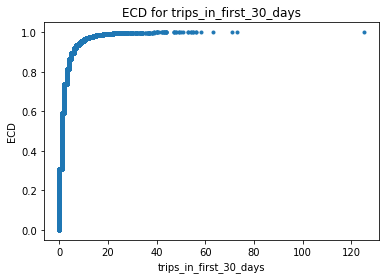

In [5]:
# Compute ECDF for trips_in_first_30_days
x, y = ecdf(df.trips_in_first_30_days)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('trips_in_first_30_days')
_=plt.ylabel('ECD')
_=plt.title('ECD for trips_in_first_30_days')

plt.show()


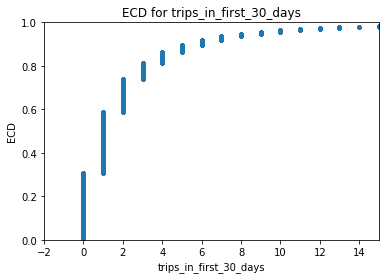

In [6]:
# zoom in the ECDF to look at the values less than 15, 99% of the riders had less than 15 trips in the first month
# 80% of the riders had less than 3 trips in the first month, in other words, most of the riders are infrequent users

x, y = ecdf(df.trips_in_first_30_days)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('trips_in_first_30_days')
_=plt.ylabel('ECD')
_=plt.title('ECD for trips_in_first_30_days')

# zoom in to the ECDF chart
plt.axis([-2,15,0,1])
plt.show()


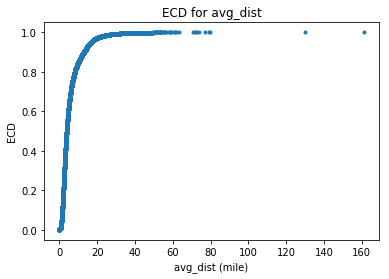

In [7]:
# Compute ECDF for average distant
x, y = ecdf(df.avg_dist)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('avg_dist (mile)')
_=plt.ylabel('ECD')
_=plt.title('ECD for avg_dist')
plt.show()

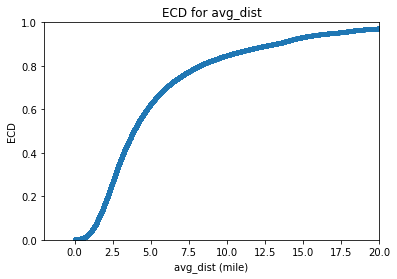

In [8]:
# zoom in the ECDF for average distant, 50% of the trips are less than 5 miles and 80% of the trips are less than 10 miles
# this result suggests that most of the trips are short distant

x, y = ecdf(df.avg_dist)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('avg_dist (mile)')
_=plt.ylabel('ECD')
_=plt.title('ECD for avg_dist')

# zoom in to the ECDF chart
plt.axis([-2,20,0,1])
plt.show()

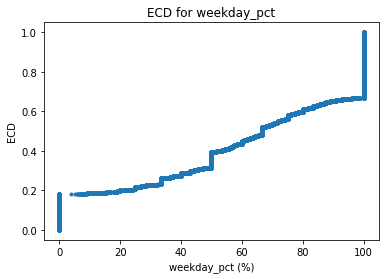

In [9]:
# Compute ECDF for weekday_pct, it shows that about 20% of the riders are exclusively weekend riders while 25% are 
# exclusively weekday riders, the rest use the service in both weekday and weekend

x, y = ecdf(df.weekday_pct)

# Generate plot
_=plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes
_=plt.xlabel('weekday_pct (%)')
_=plt.ylabel('ECD')
_=plt.title('ECD for weekday_pct')
plt.show()

In [10]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_year,last_trip_month,last_trip_day,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,4.7,2014,6,17,yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014,5,5,no
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,4.3,2014,1,7,no
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.6,2014,6,29,yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.4,2014,3,15,no


In [12]:
# calcuate fraction of active user, which is 0.376
active_user=df[df['active_user']=='yes'].count()
total_user=df.count()
active_user_fraction=active_user/total_user
print(active_user_fraction)

city                      0.37608
trips_in_first_30_days    0.37608
signup_date               0.37608
avg_rating_of_driver      0.37608
avg_surge                 0.37608
last_trip_date            0.37608
phone                     0.37608
surge_pct                 0.37608
ultimate_black_user       0.37608
weekday_pct               0.37608
avg_dist                  0.37608
avg_rating_by_driver      0.37608
last_trip_year            0.37608
last_trip_month           0.37608
last_trip_day             0.37608
active_user               0.37608
dtype: float64


In [16]:
# pickle the dataframe for data exploring
outfile = open(r'C:\A\Education\Data Science\Ultimate Technologies Inc\part_3_data_exploration','wb')
pickle.dump(df,outfile)
outfile.close()